In [1]:
import keras

Using TensorFlow backend.


In [2]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'engine',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

## Convolutional Neural Network

* The patterns they learn are translation invariant.
* They can learn spatial hierarchies of patterns:
    A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical).
* Highly efficient on perceptual problems
* Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns: in the case of images, patterns found in small 2D windows of the inputs.

![alt text](cat.png)

## Create a small CNN for classifying the MNIST dataset

In [3]:
from keras import layers
from keras import models

# Create a sequential model
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # no: of channels/output_depth, window_height, window_width
# Output of conv layer above is a feature map of size output_height, output_width, output_depth. Output_width/height different from input_height and width due to border effects
model.add(layers.MaxPooling2D((2, 2))) # This layer downsamples the feature maps input to it, using windows of size 2x2 and stride 2. This takes the maximum value of each window
# The above layer downsampled by a factor of 2 in each direction. Max pooling layers are necessary for learning spatial hierarchies
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Relu functions have sparse activations
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Note that the depth of the feature maps gradually increase while the size of the feature maps gradually decrease

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

![alt text](conv.png)

![alt text](features.png)

![alt text](layers2.png)

In [4]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Because of the shape of the sigmoid function, extreme values as inputs to the sigmoid function tend to result in smaller partial derivatives for that cost function. This results in slower learning when the inputs are really far away from zero if the objective is to bring the cost function to zero.

It turns out that we can solve the problem by replacing the quadratic cost with a different cost function, known as the cross-entropy.

For a simple neural network output given by 'a'

$a = sigma(z)$

where 

$z = w*x + b$

Let the desired output be y, then the Cross entropy cost is given by

$cost = y*ln(a) + (1-y)*ln(1 -a)$

This satisfies all the properties of a cost function: when y = 1 and a close to 1, cost = 0
and when y = 0 and a is close to 0, cost = 0

Partial derivative of this cost is given by  $x * (sigma(z) - y)$
This is great because now the learning rate is proportional to (a - y), so the farther a is from y, the larger the gradient.

See here for details http://neuralnetworksanddeeplearning.com/chap3.html

### Load and train on the MNIST Data

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 27s - loss: 0.1700 - acc: 0.9473    
Epoch 2/5
60000/60000 [==============================] - 32s - loss: 0.0488 - acc: 0.9856    
Epoch 3/5
60000/60000 [==============================] - 27s - loss: 0.0346 - acc: 0.9896    
Epoch 4/5
60000/60000 [==============================] - 27s - loss: 0.0267 - acc: 0.9919    
Epoch 5/5
60000/60000 [==============================] - 29s - loss: 0.0213 - acc: 0.9936    


** Test the accuracy **

** Accuracy is measured as (true_positives + true_negatives) / Total_instances **

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss,test_acc)

 9856/10000 [============================>.] - ETA: 0s0.0361112085581 0.9902


## What happens when you don't have a lot of data ??

* Having to train an image-classification model using very little data is a common situation
* Fortunately there are a few techniques to deal with this
* Data augmentation ( We will only cover this in our example today )
* Fine-tuning a pretrained network (Not covered)

###  Cats and Dogs example from Kaggle

In [8]:
# Download the data
import os, shutil

original_dataset_dir = '/home/mapped/dogs-vs-cats-redux-kernels-edition/train/'    

base_dir = '/home/srijith/cats_and_dogs_small/'                 

train_dir = os.path.join(base_dir, 'train')
if(os.path.isdir(train_dir) == False):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')

if(os.path.isdir(validation_dir) == False):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')

if(os.path.isdir(test_dir) == False):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')

if(os.path.isdir(train_cats_dir) == False):
    os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')
if(os.path.isdir(train_dogs_dir) == False):
    os.mkdir(train_dogs_dir)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')
if(os.path.isdir(validation_cats_dir) == False):
    os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if(os.path.isdir(validation_dogs_dir) == False):
    os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')
if(os.path.isdir(test_cats_dir) == False):
    os.mkdir(test_cats_dir)                                                    
 
test_dogs_dir = os.path.join(test_dir, 'dogs')
if(os.path.isdir(test_dogs_dir) == False):
    os.mkdir(test_dogs_dir)                                                  

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)                                              

FileNotFoundError: [Errno 2] No such file or directory: '/home/mapped/dogs-vs-cats-redux-kernels-edition/train/cat.0.jpg'

**Check the files**

In [9]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


** We will reuse the same general structure: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. But because you’re dealing with bigger images and a more complex problem, you’ll make your network larger, accordingly: it will have one more Conv2D + MaxPooling2D stage.**

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # image size is 150x150 and 3 rgb channels
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [16]:
# Compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #lr is the learning rate
              metrics=['acc'])

In [17]:
# Convert the data from JPEGs to floating point numbers
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150),                                 
        batch_size=20,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,   # batch size of 20 times steps per epoch of 100 = training data size 2000
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 46s - loss: 0.6915 - acc: 0.5195 - val_loss: 0.6773 - val_acc: 0.5130
Epoch 2/30
100/100 [==============================] - 41s - loss: 0.6485 - acc: 0.6155 - val_loss: 0.6307 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 43s - loss: 0.5909 - acc: 0.6770 - val_loss: 0.6060 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 39s - loss: 0.5532 - acc: 0.7030 - val_loss: 0.6019 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 39s - loss: 0.5342 - acc: 0.7195 - val_loss: 0.6286 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 39s - loss: 0.5082 - acc: 0.7580 - val_loss: 0.5848 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 39s - loss: 0.4860 - acc: 0.7665 - val_loss: 0.5766 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 39s - loss: 0.4551 - acc: 0.7810 - val_loss: 0.5862 - val_acc: 0.6980
Epoch 9/

In [19]:
model.save('cats_and_dogs_small_1.h5')

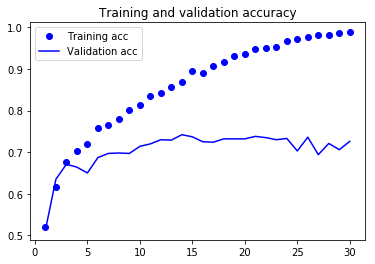

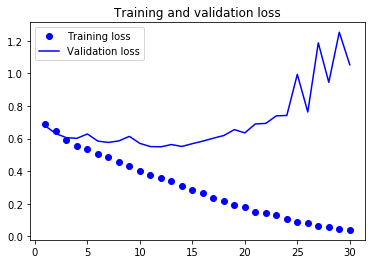

In [20]:
# Plot the graphs - These plots are characteristic of overfitting.
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Create more data through random transformations of the data. The goal is that during training, the model never sees the same picture twice. This helps generalize better. Also, apply dropout. **

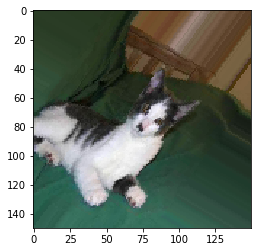

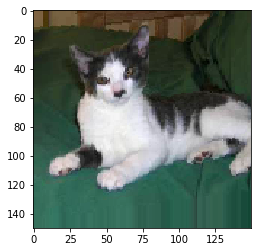

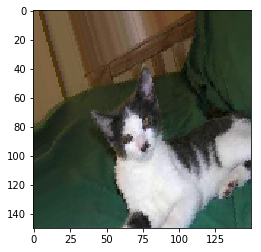

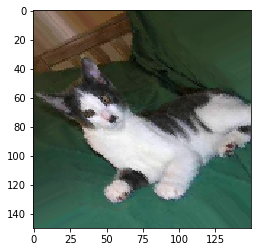

In [21]:
# Use data augmentation

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

** Let us train a new network with data augmentation and dropout **

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 81s - loss: 0.6881 - acc: 0.5406 - val_loss: 0.6796 - val_acc: 0.5920
Epoch 2/100
100/100 [==============================] - 77s - loss: 0.6771 - acc: 0.5700 - val_loss: 0.6557 - val_acc: 0.6166
Epoch 3/100
100/100 [==============================] - 77s - loss: 0.6598 - acc: 0.6228 - val_loss: 0.7063 - val_acc: 0.5238
Epoch 4/100
100/100 [==============================] - 74s - loss: 0.6453 - acc: 0.6106 - val_loss: 0.6175 - val_acc: 0.6720
Epoch 5/100
100/100 [==============================] - 73s - loss: 0.6335 - acc: 0.6422 - val_loss: 0.5944 - val_acc: 0.6875
Epoch 6/100
100/100 [==============================] - 73s - loss: 0.6116 - acc: 0.6578 - val_loss: 0.5887 - val_acc: 0.6910
Epoch 7/100
100/100 [==============================] - 70s - loss: 0.5949 - acc: 0.6781 - val_loss: 0.5894 - val_acc: 0.6669
Epoch 8/100
100/100 [====================

In [ ]:
model.save('cats_and_dogs_small_2.h5')

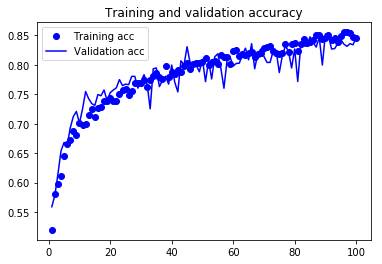

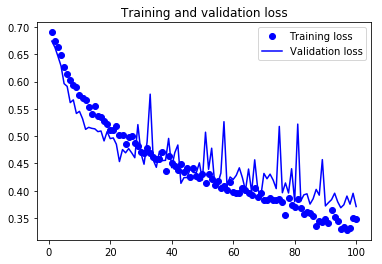

In [22]:
# Plot the graphs - These plots are much better
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Reloading a model and verifying accuracy **

In [23]:
from keras.models import load_model
m = load_model('/home/srijith/cats_and_dogs_small_2.h5')
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [24]:
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)               

test_generator = test_datagen.flow_from_directory(
        test_dir,                                              
        target_size=(150, 150),                                 
        batch_size=1,
        class_mode='binary')

predicted = m.predict_generator(test_generator,steps=4,verbose=True)
print(predicted)

Found 1000 images belonging to 2 classes.
1/4 [======>.......................] - ETA: 0s[[ 0.99640971]
 [ 0.12612586]
 [ 0.9985494 ]
 [ 0.07121485]]


In [25]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)               

test_generator = test_datagen.flow_from_directory(
        test_dir,                                              
        target_size=(150, 150),                                 
        batch_size=1,
        class_mode='binary')


m.evaluate_generator(test_generator,1000)

Found 1000 images belonging to 2 classes.


[0.47597323375518941, 0.80600000000000005]

In [27]:
m.metrics_names

['loss', 'acc']

In [2]:
keras.__version__

'2.0.8'